# Exploring our data
I'll try my best to document everything for the report
<br>For now, everything done to the data is in data_processing.py. If you need explanations just ask
<br>From 4/10 on, whenever I change something in that file, I'll have the reasoning here

In [ ]:
import sys
sys.dont_write_bytecode = True

# uncomment load_ext line when you initially use the file, after you can comment to get rid of the warning that'll show up
# %load_ext autoreload 
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_processing import prepData, transformData
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score # for finding r2 and MSE
from sklearn.inspection import partial_dependence
import shap
import itertools
from IPython.display import clear_output

path = '../data/bike.csv'
df = pd.read_csv(path, encoding_errors='ignore', parse_dates=['Date'], dayfirst=True)
pd.set_option('display.max_columns', None) # lets you scroll if your monitor isn't wide enough

df = prepData(df)
display(df)

from sklearn.linear_model import HuberRegressor, Lasso, LinearRegression
from sklearn.ensemble import ExtraTreesRegressor

# pulled from modeling file
H = HuberRegressor(alpha=1e-3, epsilon=1.35, max_iter=1000)  

c:\Python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Precipitation (cm),Rainfall(mm),Snowfall (cm),Spring,Summer,Winter,Spring_Temp,Summer_Temp,Winter_Temp
Date,,,,,,,,,,,,,,,
2017-12-01,9539,-2.454167,45.875000,1.537500,1870.750000,1.16,0.00,0.0,0.0,0,0,1,-0.0,-0.0,-2.454167
2017-12-02,8523,1.325000,61.958333,1.712500,1471.083333,1.12,0.00,0.0,0.0,0,0,1,0.0,0.0,1.325000
2017-12-03,7222,4.875000,81.541667,1.612500,455.750000,0.69,0.40,4.0,0.0,0,0,1,0.0,0.0,4.875000
2017-12-04,8729,-0.304167,52.500000,3.450000,1362.833333,1.17,0.01,0.1,0.0,0,0,1,-0.0,-0.0,-0.304167
2017-12-05,8307,-4.458333,36.416667,1.108333,1959.458333,0.64,0.00,0.0,0.0,0,0,1,-0.0,-0.0,-4.458333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,17162,6.320833,70.500000,1.029167,475.000000,1.74,2.90,0.0,2.9,0,0,0,0.0,0.0,0.000000
2018-11-27,16282,7.066667,68.000000,1.350000,405.291667,0.87,0.00,0.0,0.0,0,0,0,0.0,0.0,0.000000
2018-11-28,16524,5.304167,25.791667,1.695833,1429.083333,1.86,0.00,0.0,0.0,0,0,0,0.0,0.0,0.000000


In [4]:
y = df['Rented Bike Count'].to_numpy() # target value
X = df.drop('Rented Bike Count', axis=1) # taking out the target value

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle=True, random_state=1)

# X_train, X_test, y_train, y_test = transformData(X_train, X_test, y_train, y_test)
# X_train = pd.DataFrame(X_train, columns=X.columns) # so we can visualize everything nicely
# X_test = pd.DataFrame(X_test, columns=X.columns) # so we can visualize everything nicely

<Axes: >

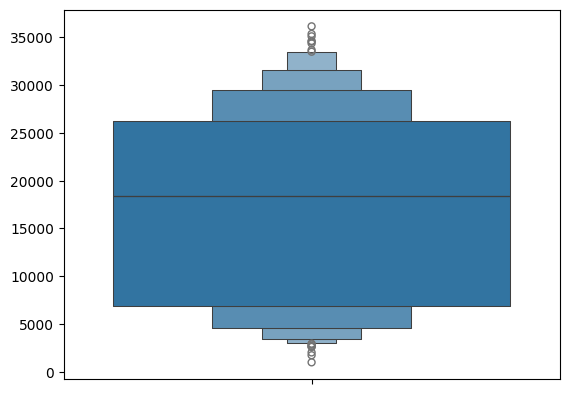

In [5]:
sns.boxenplot(y_train) # looks good enough for me, some outliers but im not retuning

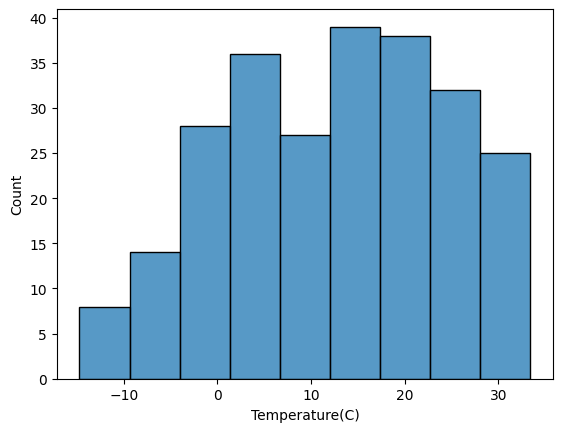

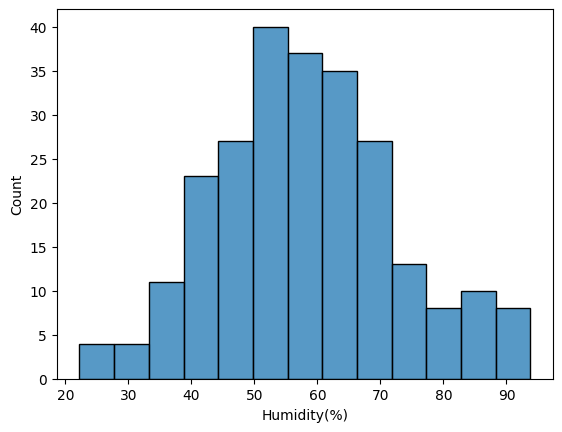

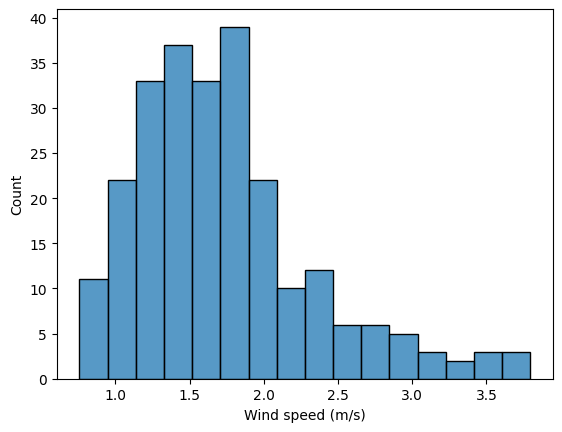

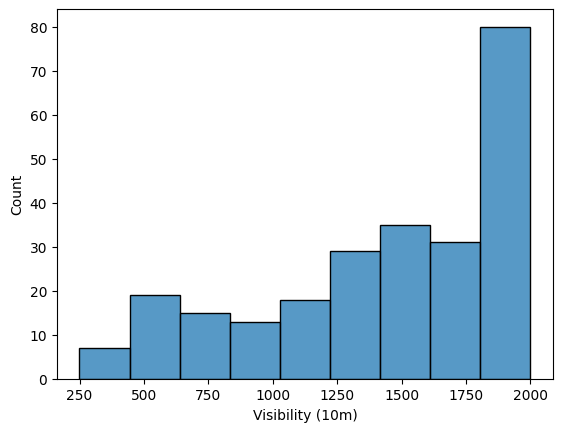

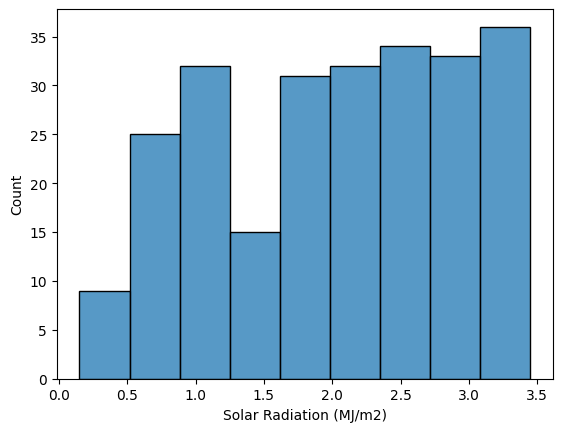

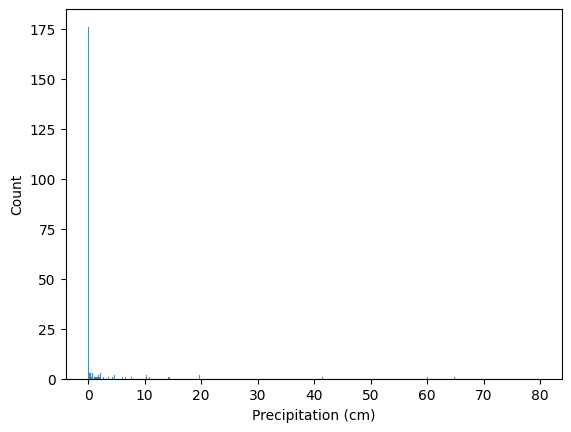

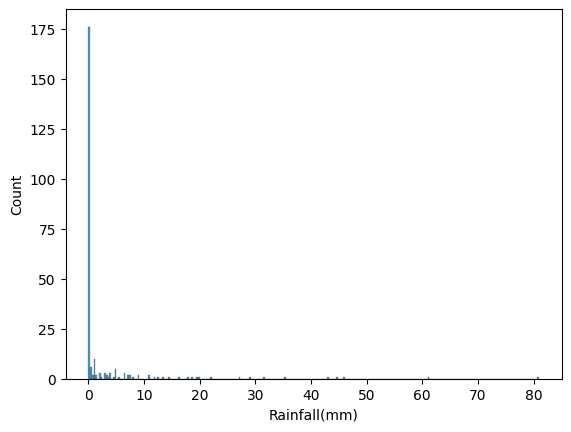

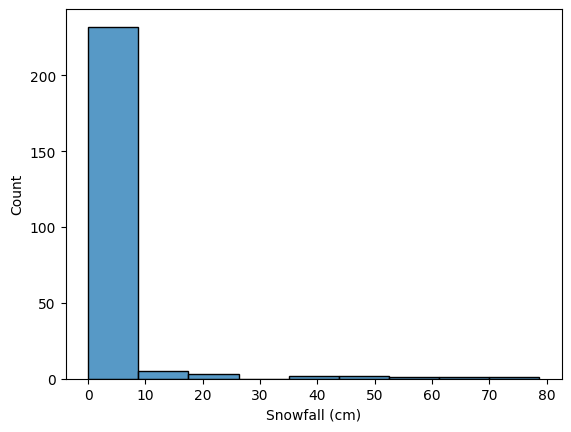

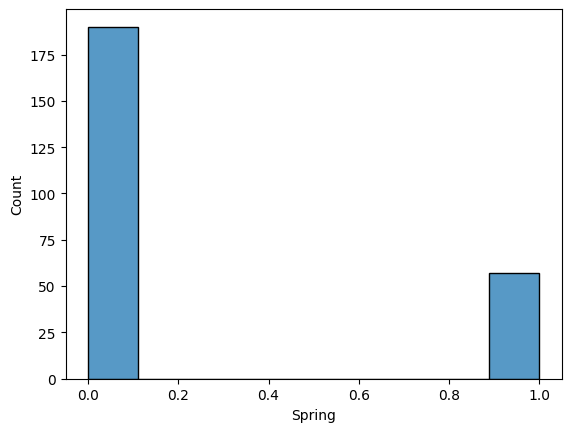

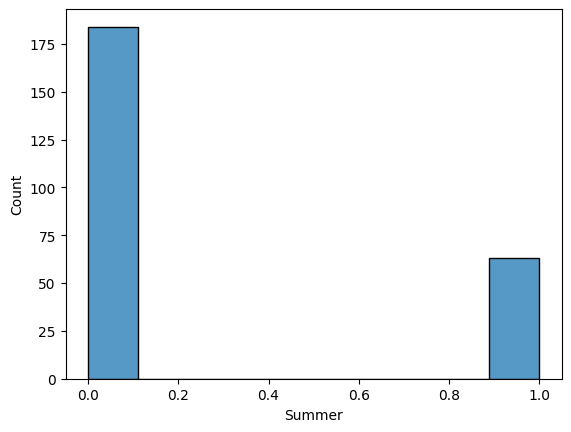

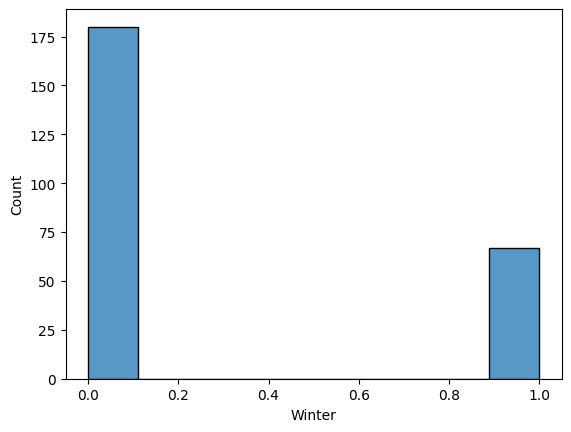

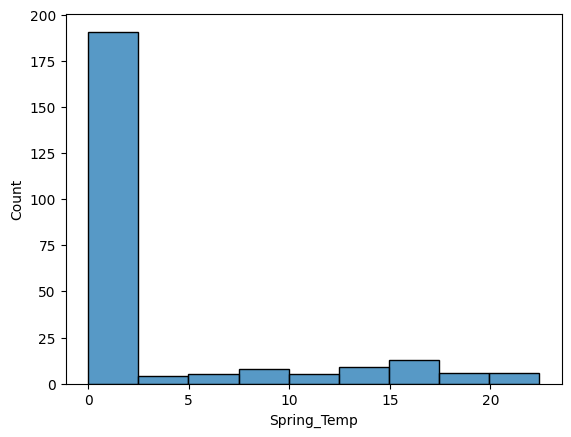

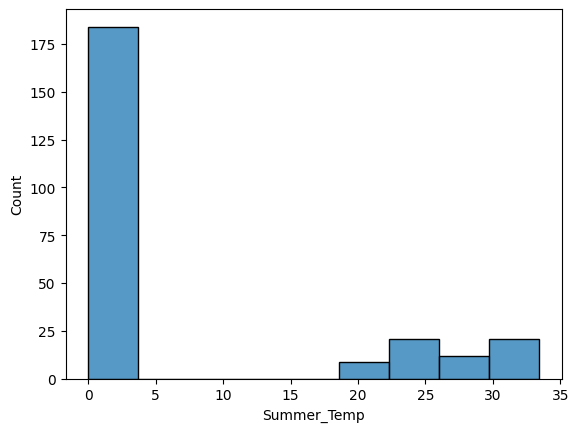

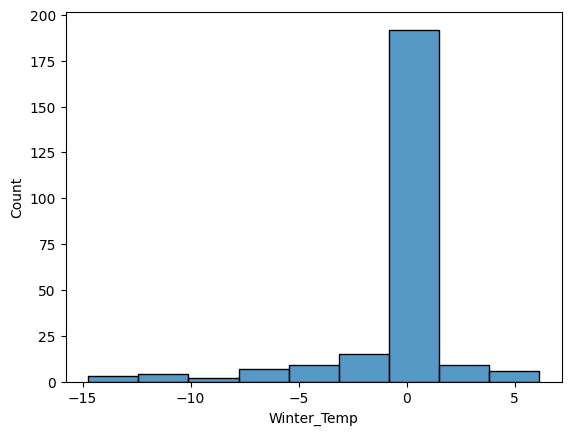

In [6]:
for col in X_train.columns:
	sns.histplot(X_train[col])
	plt.show()
# looked ok enough

In [3]:
def pdp(model):
    model.fit(X_train, y_train)
    # List of all feature names
    features = list(X_train.columns)
    # Generate all unique pairs
    feature_pairs = list(itertools.combinations(features, 2))
    # Store results
    interaction_scores = []
    # Loop over each pair and compute the 2D partial dependence surface
    for pair in feature_pairs:
        try:
            pd_result = partial_dependence(model, X_train, list(pair))
            values = pd_result['average'][0]  # shape: (n_vals_1, n_vals_2)
            # Use std deviation or range as a simple interaction strength proxy
            interaction_strength = np.std(values)  # or np.ptp(values) for range
            interaction_scores.append({
                'feature_1': pair[0],
                'feature_2': pair[1],
                'interaction_strength': interaction_strength
            })
            
        except Exception as e:
            print(f"Skipping {pair}: {e}")

    # Convert to DataFrame and sort
    interaction_df = pd.DataFrame(interaction_scores)
    interaction_df = interaction_df.sort_values(by='interaction_strength', ascending=False)
    clear_output(True)
    return interaction_df

In [72]:
pdp_results = pdp(H)

In [73]:
display(pdp_results.head(20))

,feature_1,feature_2,interaction_strength
8,Temperature(C),Summer,6477.643167
9,Temperature(C),Winter,6256.272396
7,Temperature(C),Spring,6208.934572
3,Temperature(C),Solar Radiation (MJ/m2),5960.710885
6,Temperature(C),Snowfall (cm),5927.090074
11,Temperature(C),Summer_Temp,5888.866684
5,Temperature(C),Rainfall(mm),5572.778844
10,Temperature(C),Spring_Temp,5540.502600
12,Temperature(C),Winter_Temp,5524.177454
1,Temperature(C),Wind speed (m/s),5418.338053


Functioning day is really affecting the model
<br>There's something funky that we gotta find

In [ ]:
# binary_features = [col for col in X_train.columns if X_train[col].nunique() <= 2]

# # Filter to only interactions involving Functioning Day AND non-binary feature
# top_interactions = pdp_results[
#     ((pdp_results['feature_1'] == 'Functioning Day') & (~pdp_results['feature_2'].isin(binary_features))) |
#     ((pdp_results['feature_2'] == 'Functioning Day') & (~pdp_results['feature_1'].isin(binary_features)))
# ].head(3)

# # Add interaction features
# for _, row in top_interactions.iterrows():
#     f1, f2 = row['feature_1'], row['feature_2']
    
#     if f1 == 'Functioning Day':
#         other_feature = f2
#     else:
#         other_feature = f1

#     new_col = f"{other_feature}_x_FunctioningDay"
#     X_train[new_col] = X_train[other_feature] * X_train['Functioning Day']
#     X_test[new_col] = X_test[other_feature] * X_test['Functioning Day']

Didn't show it but pretty much, i added new features for the non binary features that have high interactions with Functioning day
<br>When i tested it, it only raised the MSE so my guess is that it's just adding noise
<br>I think this is because FunctioningDay is so imbalanced. Only 12 days are non functioning but taking out those days just makes our model perform worse so ggs

In [19]:
def test_model(model):
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, train_pred)
    r2_test = r2_score(y_test, test_pred)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse = np.sqrt(mse_test)

    #clear_output(True)
    print(f"Test Accuracy: {r2_test * 100:.2f}%")
    print(f"Train Accuracy: {r2_train * 100:.2f}%")
    print(f"Accuracy Difference: {(r2_test - r2_train) * 100:.2f}%")
    print(f"Test Mean Squared Error: {mse_test:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Alternatively, it's off by an average of {round(rmse)} bikes")

    # keeping our visualizations in the transformed space
    fig, ax = plt.subplots(1, 3, figsize=(20,7))
    plt.suptitle('')
    ax[0].set_title('Predicted vs Actual for Test Set')
    ax[0].scatter(y_test, test_pred, color='blue', label='Predicted vs Actual')
    ax[0].plot(y_test, y_test, color='red', label='Ideal')
    ax[0].legend()
    ax[0].set_xlabel('Actual')
    ax[0].set_ylabel('Predicted')

    ax[1].set_title('Predicted vs Actual for Train Set')
    ax[1].scatter(y_train, train_pred, color='green', label='Predicted vs Actual')
    ax[1].plot(y_train, y_train, color='red', label='Ideal')
    ax[1].legend()
    ax[1].set_xlabel('Actual')
    ax[1].set_ylabel('Predicted')

    residuals = y_test.reshape(-1,1) - test_pred.reshape(-1,1)
    ax[2].set_title('Residual Plot for Test Set')
    ax[2].scatter(test_pred, residuals, color='blue')
    ax[2].axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
    ax[2].legend()
    ax[2].set_xlabel("Fitted")
    ax[2].set_ylabel("Residuals")

    plt.show()

c:\Python\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test Accuracy: 85.05%
Train Accuracy: 85.66%
Accuracy Difference: -0.61%
Test Mean Squared Error: 14345730.73
Root Mean Squared Error: 3787.58
Alternatively, it's off by an average of 3788 bikes


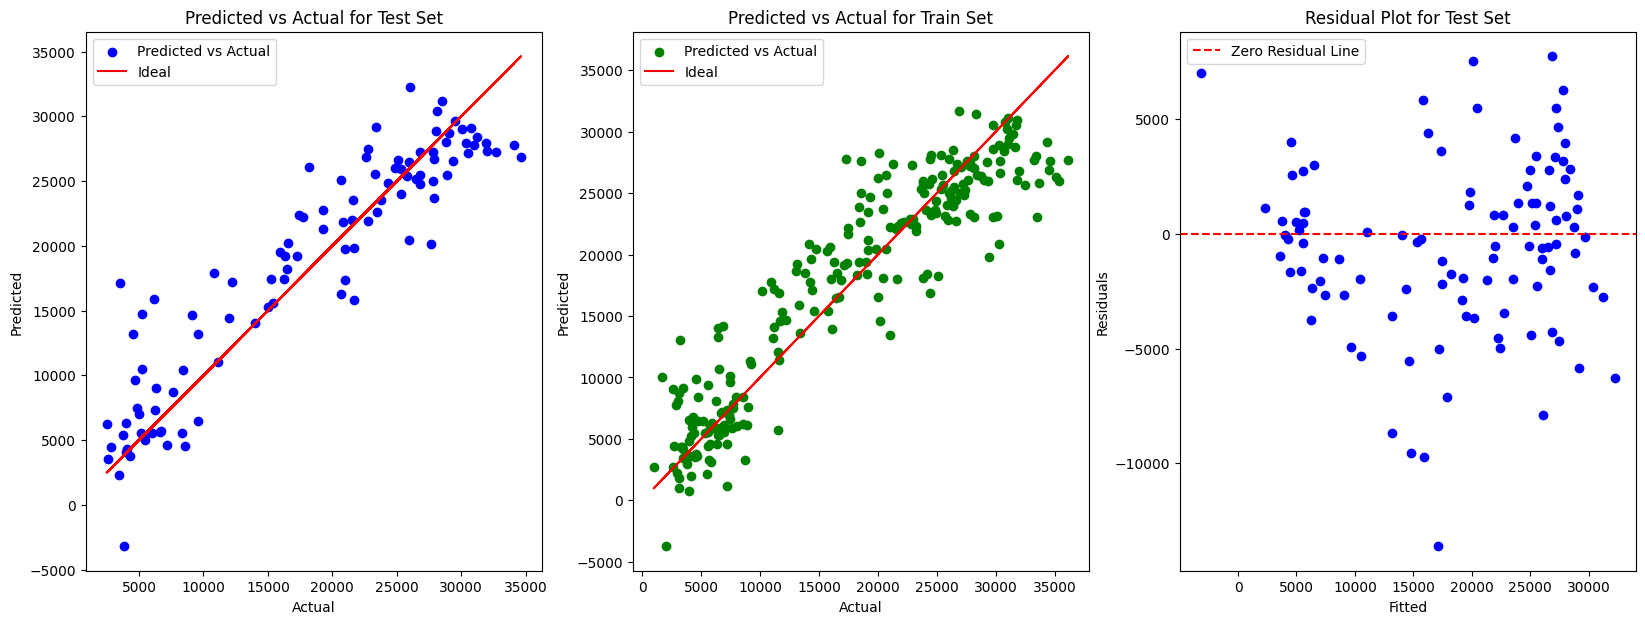

In [63]:
test_model(H)

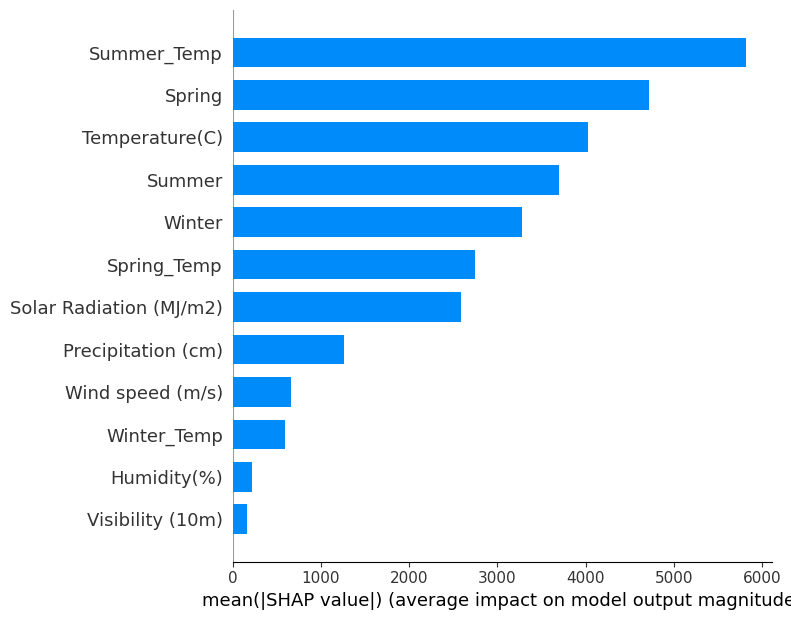

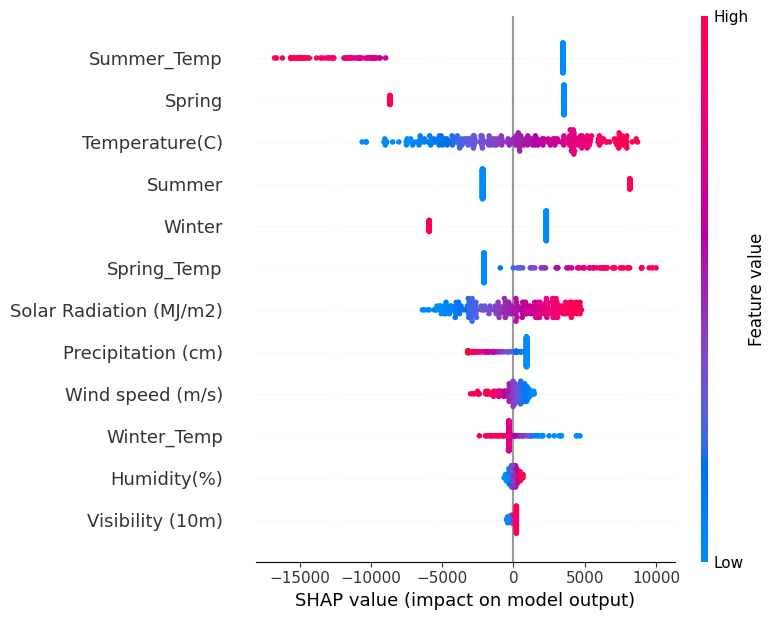

In [59]:
explainer = shap.LinearExplainer(H, X_train)
shap_values = explainer(X_train)

# Plot summary (bar)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Optional: beeswarm plot
shap.summary_plot(shap_values, X_train)

Sorry for all the output but removing visibility doesn't change much in the simple models
<br>BUT it does make ETR perform worse so ig we keep it

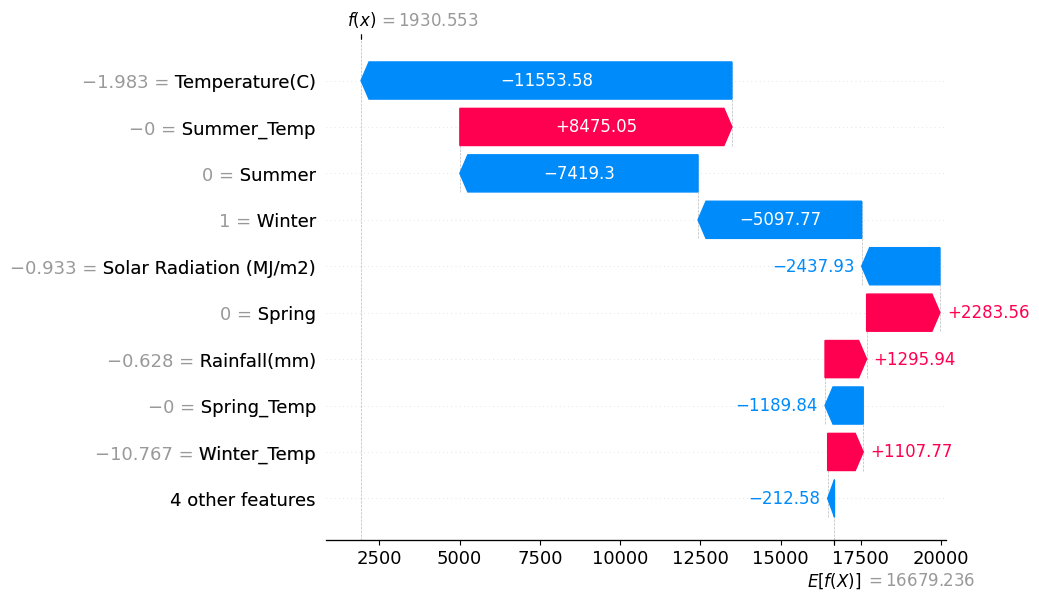

In [39]:
shap.plots.waterfall(shap_values[0])

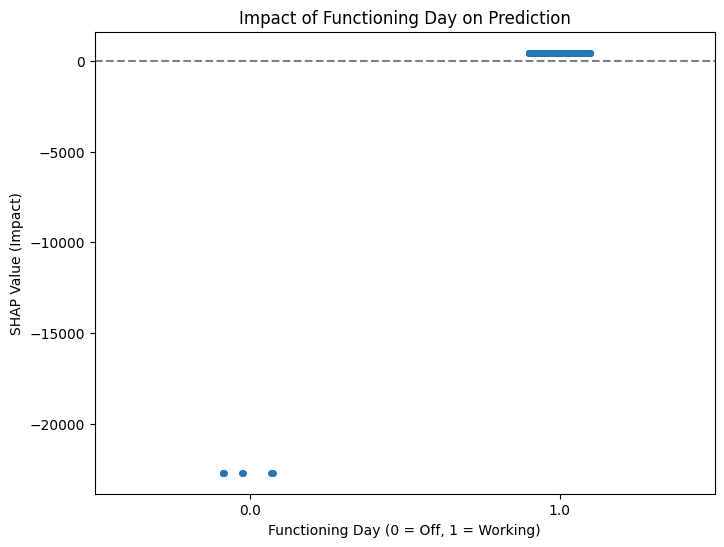

In [83]:
# Get just the SHAP values for Functioning Day
functioning_day_shap = shap_values.values[:, X_train.columns.get_loc("Functioning Day")]

# Make a DataFrame to plot
plot_df = X_train.copy()
plot_df["Functioning Day SHAP"] = functioning_day_shap

# Plot
plt.figure(figsize=(8,6))
sns.stripplot(data=plot_df, x="Functioning Day", y="Functioning Day SHAP", jitter=True)
plt.title("Impact of Functioning Day on Prediction")
plt.xlabel("Functioning Day (0 = Off, 1 = Working)")
plt.ylabel("SHAP Value (Impact)")
plt.axhline(0, color='gray', linestyle='--')
plt.show()

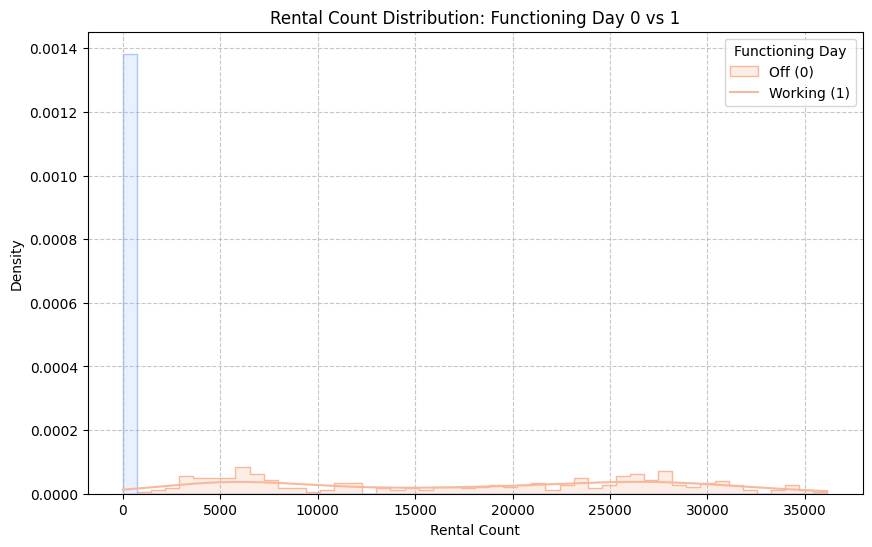

Average rentals on working day (1): 17534.94
Average rentals on off day (0): 0.00


In [ ]:
data_check = X_train.copy()
data_check["Rental Count"] = y_train

plt.figure(figsize=(10,6))
sns.histplot(
    data=data_check,
    x="Rental Count",
    hue="Functioning Day",
    bins=50,
    kde=True,
    palette="coolwarm",
    element="step",
    stat="density",
    common_norm=False
)

plt.title("Rental Count Distribution: Functioning Day 0 vs 1")
plt.xlabel("Rental Count")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Functioning Day", labels=["Off (0)", "Working (1)"])
plt.show()

mean_working = data_check[data_check["Functioning Day"] == 1]["Rental Count"].mean()
mean_off = data_check[data_check["Functioning Day"] == 0]["Rental Count"].mean()

print(f"Average rentals on working day (1): {mean_working:.2f}")
print(f"Average rentals on off day (0): {mean_off:.2f}")

No bueno because when it's a working day, it should be 0 but we can see it > 0 for some predictions

In [96]:
holiday_indices = df[df["Functioning Day"] == 0].index

# Create a list to collect indices: day before, the day itself, and day after
expanded_indices = []

for ts in holiday_indices:
    pos = df.index.get_loc(ts)
    if pos > 0:  # Make sure there's a day before
        expanded_indices.append(df.index[pos-1])
    expanded_indices.append(ts)
    if pos < len(df) - 1:  # Make sure there's a day after
        expanded_indices.append(df.index[pos+1])

# Show
display(df.loc[expanded_indices].sort_values("Date"))

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Spring,Summer,Winter
Date,,,,,,,,,,,,
2018-04-10,16696,14.654167,46.958333,3.433333,1625.416667,2.94,5.0,0.0,1,1,0,0
2018-04-11,0,12.866667,53.375000,3.008333,1331.541667,3.32,0.0,0.0,0,1,0,0
2018-04-12,22729,13.029167,32.416667,2.575000,1885.750000,3.20,0.0,0.0,1,1,0,0
2018-05-09,28895,15.458333,50.041667,1.695833,1958.791667,3.34,0.0,0.0,1,1,0,0
2018-05-10,0,15.470833,65.833333,2.254167,1099.958333,3.26,0.0,0.0,0,1,0,0
2018-05-11,26649,15.812500,63.500000,1.712500,689.458333,3.17,0.0,0.0,1,1,0,0
2018-09-17,30290,22.329167,64.666667,2.016667,1598.291667,2.83,0.1,0.0,1,0,0,0
2018-09-18,0,21.850000,59.666667,1.329167,1819.125000,2.18,0.0,0.0,0,0,0,0
2018-09-18,0,21.850000,59.666667,1.329167,1819.125000,2.18,0.0,0.0,0,0,0,0


Here I tried to see if people ordering on closed days were getting counted for the next day but that isn't the case. There's no clear pattern of the next day being affected by a closed day
<br>I did a whole lotta nothing ngl. It makes sense that functioning day drastically lowers the predictions because they should be 0 when the shop is closed
<br>OUR problem is that it SHOULD be 0 but our model doesn't think so. It just thinks it should be lower
<br>Since we don't lose too much variance when removing the 12 days that aren't functioning, we can just remove those and Functioning Day

In [9]:
season_cols = ["Spring", "Summer", "Winter"]

# Create interaction features
for col in season_cols:
    df[f"{col}_Temp"] = df[col] * df["Temperature(C)"]

display(df)
y = df['Rented Bike Count'].to_numpy() # target value
X = df.drop('Rented Bike Count', axis=1) # taking out the target value
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle=True, random_state=1)

X_train, X_test, y_train, y_test = transformData(X_train, X_test, y_train, y_test)
# still need to test model results 4/14

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Spring,Summer,Winter,Spring_Temp,Summer_Temp,Winter_Temp
Date,,,,,,,,,,,,,,,
2017-12-01,9539,-2.454167,45.875000,1.537500,1870.750000,1.16,0.0,0.0,1,0,0,1,-0.0,-0.0,-2.454167
2017-12-02,8523,1.325000,61.958333,1.712500,1471.083333,1.12,0.0,0.0,1,0,0,1,0.0,0.0,1.325000
2017-12-03,7222,4.875000,81.541667,1.612500,455.750000,0.69,4.0,0.0,1,0,0,1,0.0,0.0,4.875000
2017-12-04,8729,-0.304167,52.500000,3.450000,1362.833333,1.17,0.1,0.0,1,0,0,1,-0.0,-0.0,-0.304167
2017-12-05,8307,-4.458333,36.416667,1.108333,1959.458333,0.64,0.0,0.0,1,0,0,1,-0.0,-0.0,-4.458333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,17162,6.320833,70.500000,1.029167,475.000000,1.74,0.0,2.9,1,0,0,0,0.0,0.0,0.000000
2018-11-27,16282,7.066667,68.000000,1.350000,405.291667,0.87,0.0,0.0,1,0,0,0,0.0,0.0,0.000000
2018-11-28,16524,5.304167,25.791667,1.695833,1429.083333,1.86,0.0,0.0,1,0,0,0,0.0,0.0,0.000000


In [13]:
def test_model_numpy(model):
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Post Processing
    # Whenever the bike shop is closed, there are no bikes rented
    train_pred[X_train[:, 7] == 0] = 0 # functioning day is the 7th column, since they're numpy we can't use column names
    test_pred[X_test[:, 7] == 0] = 0
    
    r2_train = r2_score(y_train, train_pred)
    r2_test = r2_score(y_test, test_pred)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse = np.sqrt(mse_test)

    clear_output(True)
    print(f"Test Accuracy: {r2_test * 100:.2f}%")
    print(f"Train Accuracy: {r2_train * 100:.2f}%")
    print(f"Accuracy Difference: {(r2_test - r2_train) * 100:.2f}%")
    print(f"Test Mean Squared Error: {mse_test:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Alternatively, it's off by an average of {round(rmse)} bikes")

    # keeping our visualizations in the transformed space
    fig, ax = plt.subplots(1, 3, figsize=(20,7))
    plt.suptitle('')
    ax[0].set_title('Predicted vs Actual for Test Set')
    ax[0].scatter(y_test, test_pred, color='blue', label='Predicted vs Actual')
    ax[0].plot(y_test, y_test, color='red', label='Ideal')
    ax[0].legend()
    ax[0].set_xlabel('Actual')
    ax[0].set_ylabel('Predicted')

    ax[1].set_title('Predicted vs Actual for Train Set')
    ax[1].scatter(y_train, train_pred, color='green', label='Predicted vs Actual')
    ax[1].plot(y_train, y_train, color='red', label='Ideal')
    ax[1].legend()
    ax[1].set_xlabel('Actual')
    ax[1].set_ylabel('Predicted')

    residuals = y_test.reshape(-1,1) - test_pred.reshape(-1,1)
    ax[2].set_title('Residual Plot for Test Set')
    ax[2].scatter(test_pred, residuals, color='blue')
    ax[2].axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
    ax[2].legend()
    ax[2].set_xlabel("Fitted")
    ax[2].set_ylabel("Residuals")

    plt.show()

Test Accuracy: 86.35%
Train Accuracy: 85.43%
Accuracy Difference: 0.92%
Test Mean Squared Error: 13371504.47
Root Mean Squared Error: 3656.71
Alternatively, it's off by an average of 3657 bikes


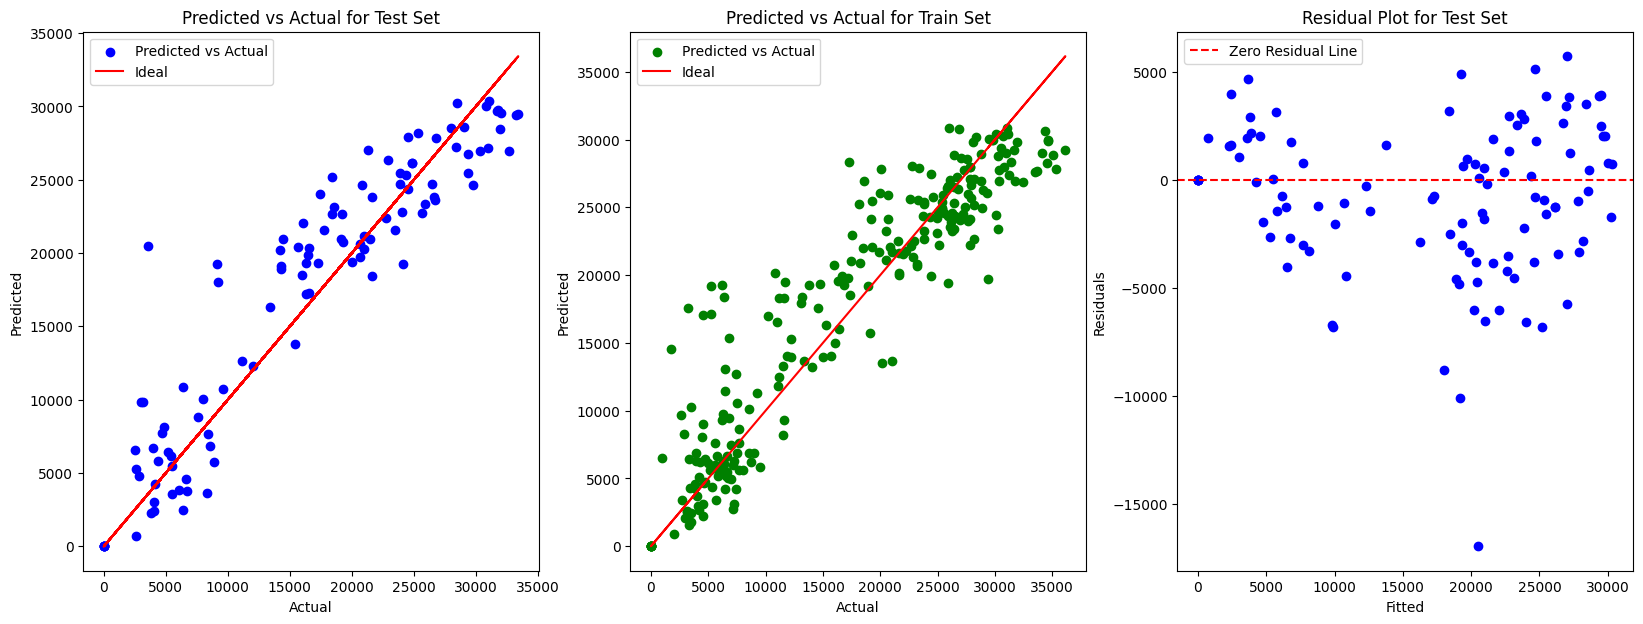

In [14]:
test_model_numpy(H)

Interactions with seasons and temp ARE SO HELPFUL
<br>I'm stopping here so I can tune models and start on report

I added a precipitation feature (rain + snow) and that helped reduce rmse

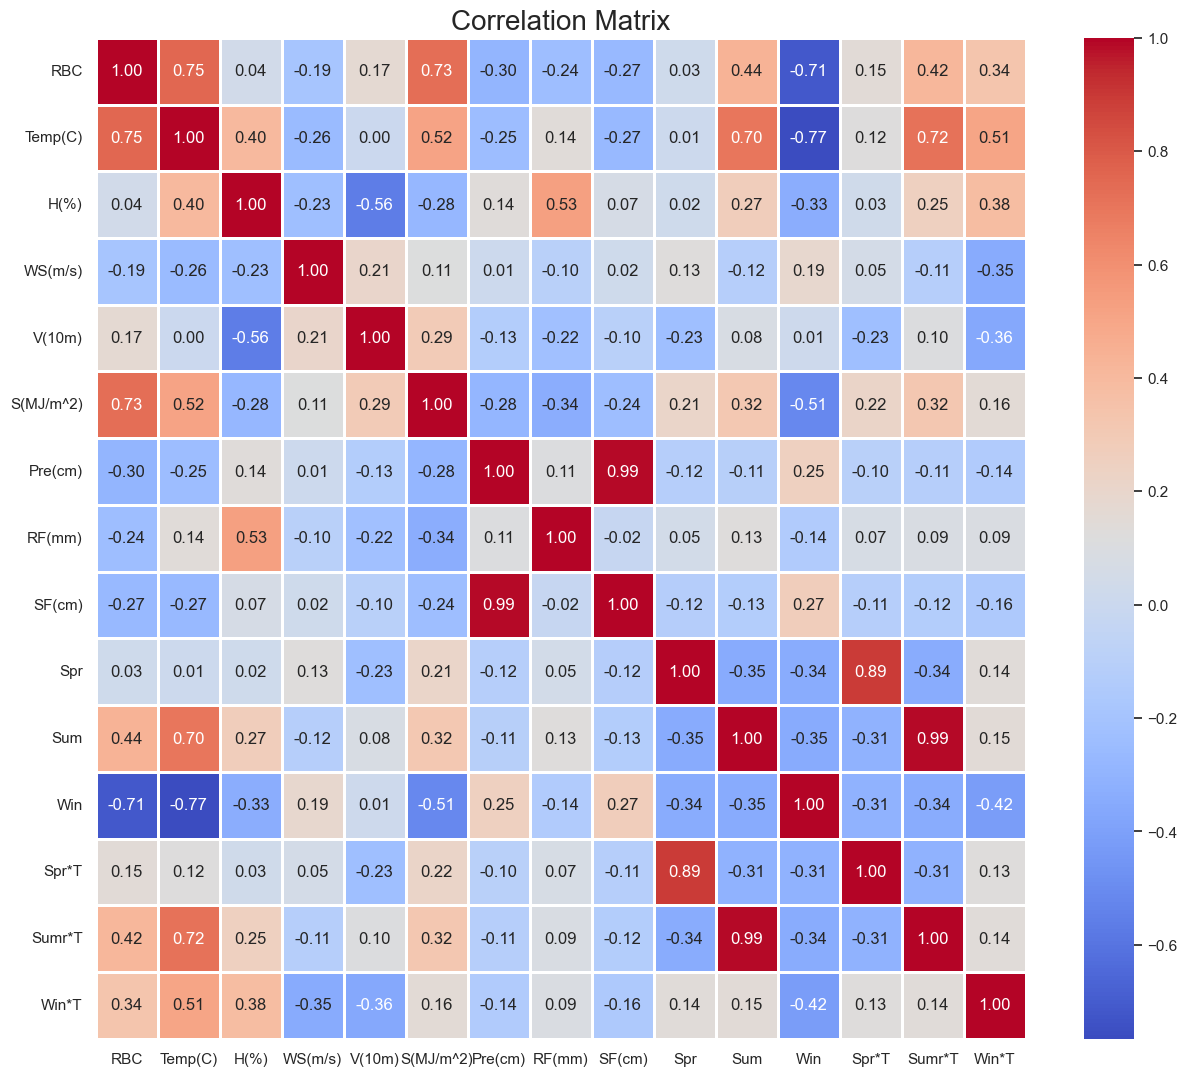

In [19]:
# doing season*temp makes it easier to explain how we captured the interaction
labels = ['RBC', 'Temp(C)', 'H(%)', 'WS(m/s)', 'V(10m)', 'S(MJ/m^2)', 'Pre(cm)', 'RF(mm)', 'SF(cm)', 'Spr', 'Sum', 'Win', 'Spr*T', 'Sumr*T', 'Win*T']
corr_matrix = df.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", yticklabels=labels, xticklabels=labels, linewidths=2)
plt.title("Correlation Matrix", fontsize=20)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()

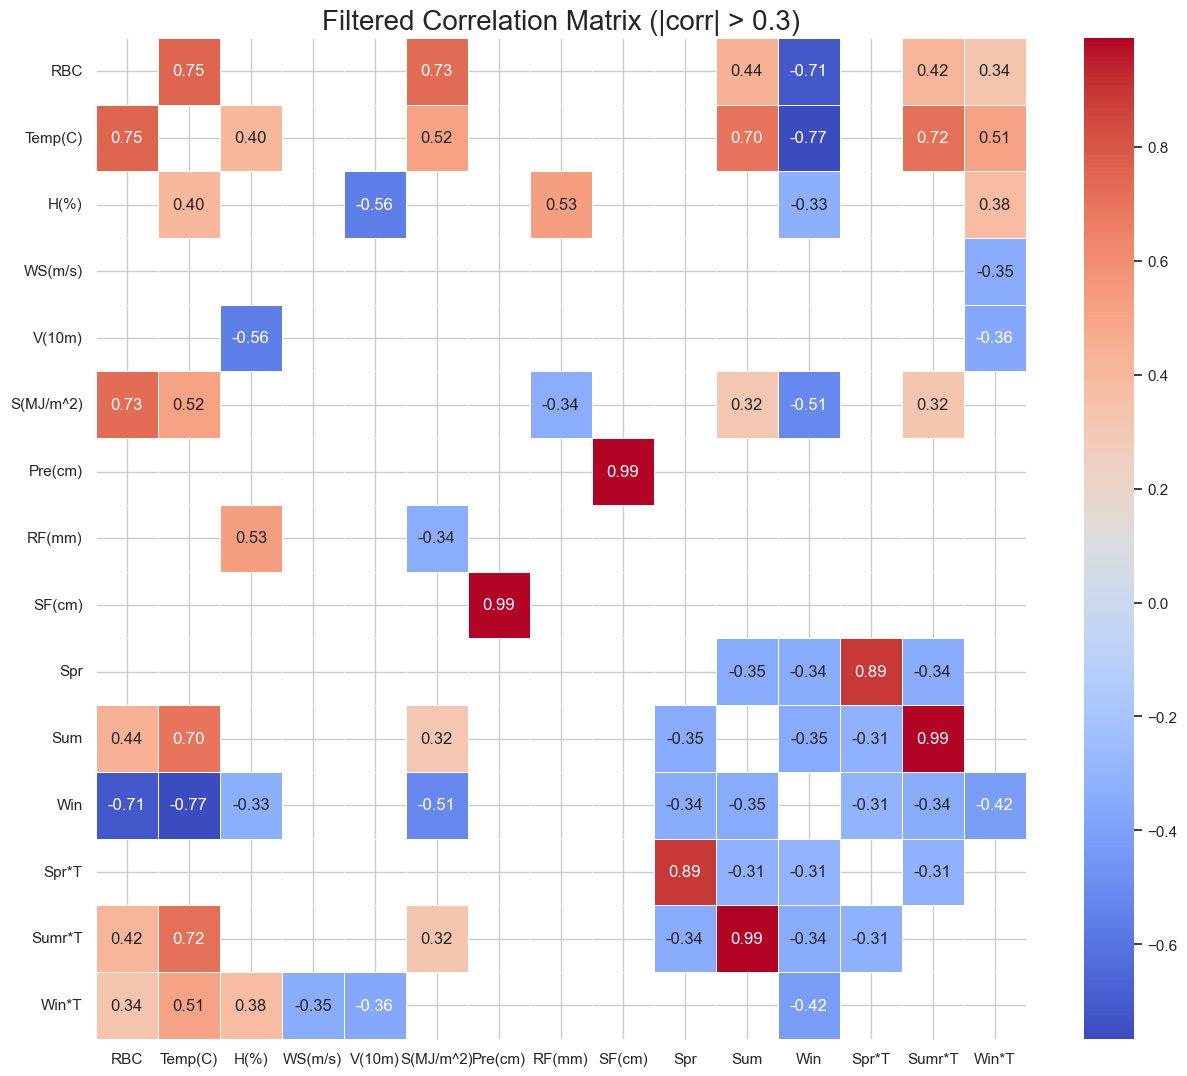

In [21]:
filtered_corr = corr_matrix.where((corr_matrix.abs() > 0.3) & (corr_matrix != 1.0))
sns.set_theme(style='whitegrid')
plt.figure(figsize=(15, 13))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", yticklabels=labels, xticklabels=labels, linewidths=0.5)
plt.title("Filtered Correlation Matrix (|corr| > 0.3)", fontsize=20)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()